<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Multivariate_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

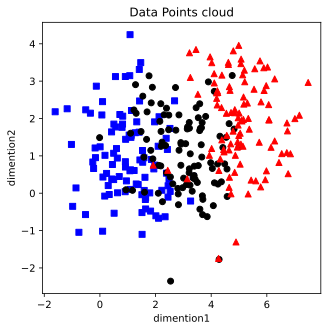

In [72]:
############## Generate Data cloude
nPerclust=100 #no of data points
deviation=1 # deviation from center

#Center of Data clouds
A=[1,1]
B=[3,1]
C=[5,2]

#generate data points
a=[A[0]+np.random.randn(nPerclust)*deviation,A[1]+np.random.randn(nPerclust)*deviation]
b=[B[0]+np.random.randn(nPerclust)*deviation,B[1]+np.random.randn(nPerclust)*deviation]
c=[C[0]+np.random.randn(nPerclust)*deviation,C[1]+np.random.randn(nPerclust)*deviation]

#True Labels
labels_np=np.vstack((np.zeros((nPerclust,1)),np.ones((nPerclust,1)),1+np.ones((nPerclust,1))))

#concatenate in a matrix
data_np=np.hstack((a,b,c)).T

#labels_np
#data_np

#convert to a pytorch tensor
data=torch.tensor(data_np).float()
labels=torch.squeeze(torch.tensor(labels_np).long())
#labels

#Show the data
fig=plt.figure(figsize=(5,5))

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.xlabel('dimention1')
plt.ylabel('dimention2')
plt.title('Data Points cloud')
plt.show();

In [73]:
#############Create ANNModel

#Model Architecture
ANNclass=nn.Sequential(
    nn.Linear(2,4),#imput is 2 ..x & y cordinate or 2D tensor
    nn.ReLU(),
    nn.Linear(4,3),
    #nn.Softmax(dim=1),
)

#Lossfunction
lossfunc=nn.CrossEntropyLoss()

#optimizer
optimizer=torch.optim.SGD(ANNclass.parameters(),lr=.01)

#Test The Model
yHat= ANNclass(data)

print(data.shape)
print(yHat.shape)


torch.Size([300, 2])
torch.Size([300, 3])


In [74]:
########################Train The Model
numepochs=10000

#initialize Losses & Ongoing Accuracy
losses=torch.zeros(numepochs)
ongoingACC=[]

##Loop over Epochs
for epochi in range(numepochs):

  #Forward Pass
  yHat=ANNclass(data)

  #Compute Loss
  loss=lossfunc(yHat,labels)
  losses[epochi]=loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #compute accuracy
  matches=torch.argmax(yHat,axis=1)==labels
  numMatches=matches.float()
  accPCT=100*torch.mean(numMatches)
  ongoingACC.append(accPCT)


  #Final forward pass

pred=ANNclass(data)
predlabels=torch.argmax(pred,axis=1)
totACC=100*torch.mean((predlabels==labels).float())

print('Total Accuracy %g%%' %totACC)



Total Accuracy 82%


Total Accuracy 82%


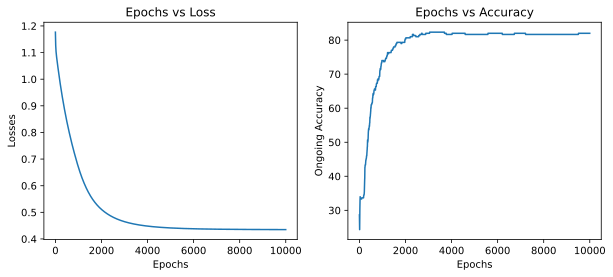

In [75]:
##############Visualize the results
print('Total Accuracy %g%%' %totACC)
fig,ax=plt.subplots(1,2,figsize=(10,4))

ax[0].plot(losses.detach())
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Losses')
ax[0].set_title('Epochs vs Loss')


ax[1].plot(ongoingACC)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Ongoing Accuracy')
ax[1].set_title('Epochs vs Accuracy')

plt.show()

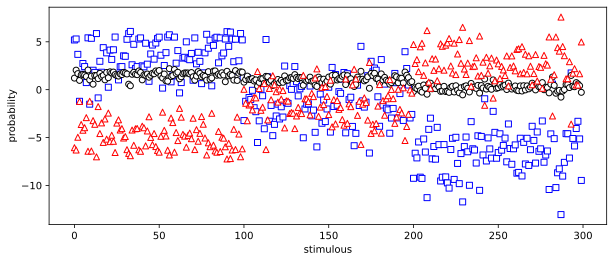

In [76]:
fig=plt.figure(figsize=(10,4))

colorshape=['bs','ko','r^']

for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')


plt.xlabel('stimulous')
plt.ylabel('probability')
plt.show()